In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from researchlib.single_import import *

In [3]:
p = builder([
    nn.Linear(10, 512),
    nn.ReLU(),
    nn.Linear(512, 784),
    layer.Reshape((-1, 1, 28, 28))
])

In [4]:
g = builder([
    nn.Linear(110, 8*4*4),
    layer.Reshape((-1, 8, 4, 4)),
    AutoConvTransposeNet2d(8, 3),
    nn.Conv2d(256, 128, 3),
    nn.BatchNorm2d(128),
    nn.ELU(),
    nn.Conv2d(128, 1, 3),
    nn.Sigmoid()
])  

In [5]:
d = builder([
#     layer.ConditionProjection(p),
    AutoConvNet2d(1, 4),
    Auxiliary(builder([
        nn.Linear(512, 10),
        nn.LogSoftmax(-1)
    ])),
    nn.Linear(512, 1),
    nn.Sigmoid(),
])

In [6]:
train_loader = VisionDataset(vision.MNIST, batch_size=32, train=True, normalize=False)

In [18]:
runner = Runner(GANModel(g, d, latent_vector_len=100, condition_vector_len=[10, None], condition_onehot=True), 
                train_loader, 
                None, 
                'rmsprop', 
                GANLoss('vanilla', aux_loss=F.nll_loss),
               monitor_state='g_loss',
               monitor_mode='min')

In [19]:
runner.init_model('orthogonal')

In [20]:
runner.fit(4)

  Epochs   train_d_loss  train_g_loss 
    1*        2.0535        3.2412    


    2*        0.8084        2.0405    


    3         0.6871        2.6432    


    4         0.5527        2.7926    


In [23]:
!ls checkpoint/default/

best.h5			     checkpoint_model_epoch_3.h5
checkpoint_model_epoch_1.h5  checkpoint_model_epoch_4.h5
checkpoint_model_epoch_2.h5


In [50]:
img = runner.model.sample(10, condition_data=range(10))

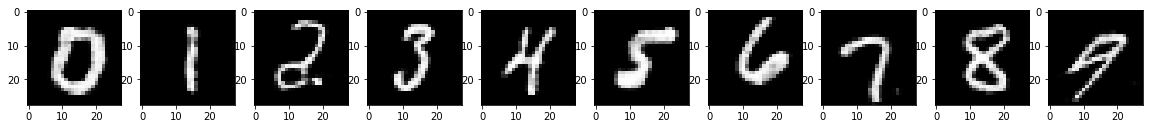

In [51]:
import matplotlib.pyplot as plt
fig, arr = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
    arr[i].imshow(img[i][0].detach().cpu().numpy(), cmap='gray')
plt.show()

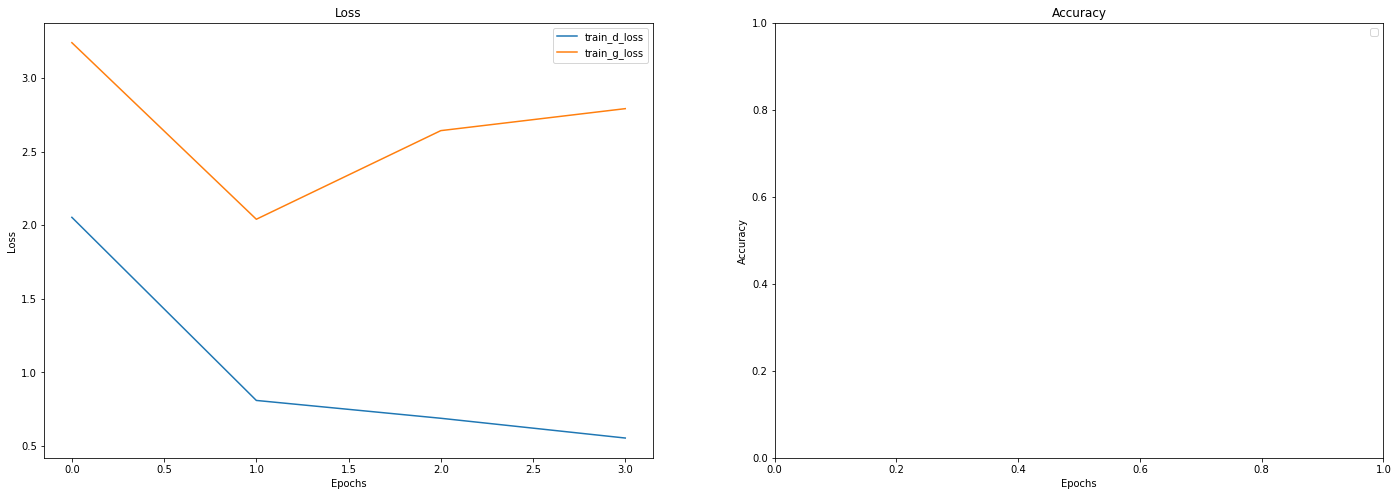

In [36]:
runner.history()